### Reading in Data

In [60]:
import pandas as pd
import seaborn as sns

In [48]:
#reading in data.csv file
tissue_pd = pd.read_csv("data.csv")

In [49]:
#looking at first five rows of our data
tissue_pd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
print(tissue_pd.shape)
print("569 rows and 33 columns")

(569, 33)
569 rows and 33 columns


Our project dataset is from the UCI Machine Learning Repository. Each row represents a patient and information around their breast tissue imaging, especially with respect to cell nuclei. 

### Data Exploration

In [51]:
#looking at column types
tissue_pd.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

There are three layers of our data: the mean (_mean), standard error (_se) and "worst" (_worst) which denotes the largest value i.e. the mean of the three largest values in the cell data. 

Our target value in terms of logistic regression is the variable 'diagnosis'. It is currently denoted as an object type; however, for regression purposes, we will convert it to a numerical type with encoding towards the end of this analysis. 

All of the other variables are floats, and they are rounded to 4 significant figures. 

In [52]:
#converting id variable to type string
tissue_pd['id'] = tissue_pd['id'].astype(str)

In [53]:
#describing the data
tissue_pd.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


From looking at the description of the numerical variables, I am going to remove the column 'Unnamed:32', as it does not have any values besides NaN. It will not be helpful in our analysis or modeling.

In [54]:
#dropping Unnamed column
tissue_pd = tissue_pd.drop(['Unnamed: 32'],axis='columns')

In [55]:
tissue_pd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


I also want to look at the class distribution of our target variable 'diagnosis', as it will help us understand if we need to account for class imbalance in our modeling.

In [56]:
#looking at value counts of diagnosis variable
tissue_pd['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Out of the 569 patients that were screened for breast cancer, 357 were diagnosed with benign masses, meaning they do not have breast cancer. The other 212 patients were found to have malignant or cancerous tumors.

In terms of class distribution, they are pretty equal in sample size, and I would say that the classes are not imbalanced.

1/2 * 569 = 284.5

- Benign class is slightly above half
- Malignant class is slightly below half

### Data Visualizations

##### Histograms of Numeric Variables

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

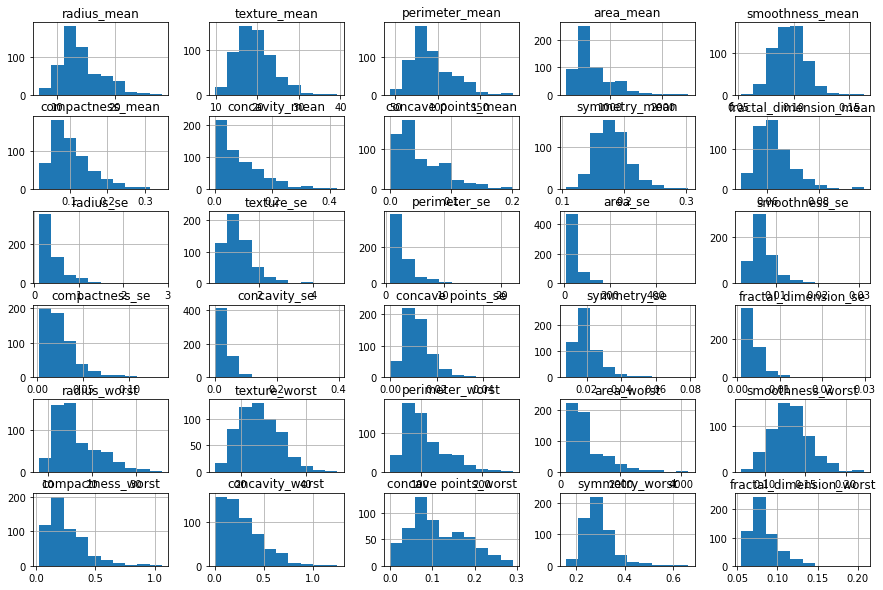

In [59]:
tissue_pd.hist(bins=10, figsize=(15, 10))

Most of the distributions for the numerical variables in the dataset lean towards a positive skew (majority of the points are at the lower value range). 

There are a few distributions that are relatively normal though: texture_mean, smoothness_mean, symmetry_mean, texture_worst and smoothness_worst. They are mostly centered around the mean of the column values, and follow a relatively similar Guassian distribution. There are also some variables which may contain outliers, and when those are assessed and possibly removed, we can look at their histograms again to assess normality.

#### Boxplots to Assess Outliers

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='perimeter_mean'>

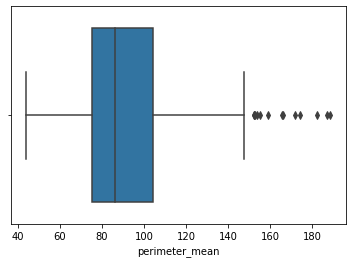

In [62]:
#boxplot of perimeter_mean
sns.boxplot(tissue_pd['perimeter_mean'])

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='concave points_mean'>

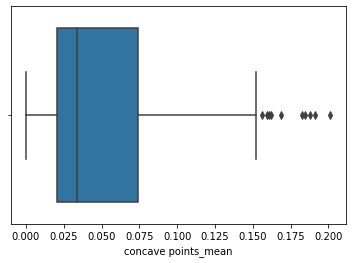

In [65]:
#boxplot of concavepoints_mean
sns.boxplot(tissue_pd['concave points_mean'])

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fractal_dimension_mean'>

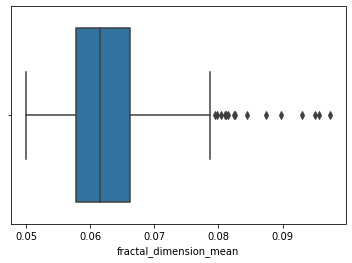

In [66]:
sns.boxplot(tissue_pd['fractal_dimension_mean'])

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='texture_se'>

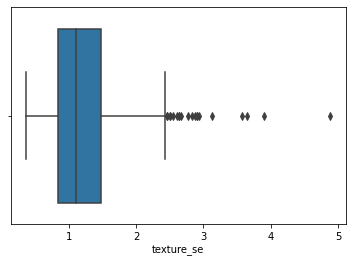

In [67]:
sns.boxplot(tissue_pd['texture_se'])

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_worst'>

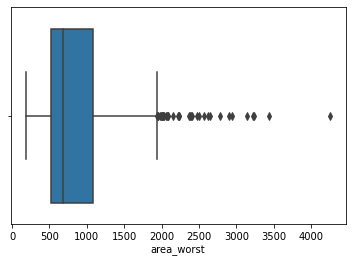

In [68]:
sns.boxplot(tissue_pd['area_worst'])

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='compactness_worst'>

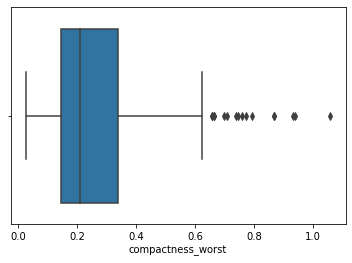

In [69]:
sns.boxplot(tissue_pd['compactness_worst'])

### Paper Information

Curvature
- deviations from a circle are problematic for malignancy
- can lead to quickly-dividing cells which usually points to cancer
- high or low pints are concerning

Larger values typically indicate a higher likelihood of malignancy

Radius
- averaging the length of the radial line segments defined by the centroid of the snake and the individual snake points

Perimeter
- total distance between snake points

Area

Compactness
- permiter and area are combined
- increases with the irregularity of boundaries


Smoothness

Concavity
- boundary inside of chords

Concave Points

Symmetry

Fractal Dimension
- higher value corresponds to a less regular contour ... higher probability of malignancy

Texture
- variance of the gray scale intensities 

Extreme values are the most intuitively useful for the problem at hand, since only a few malignant cells may occur in a given sample